In [1]:
import numpy as np
import xarray as xr
# from ocetrac import tracker as oce
import ocetrac as oce

In [2]:
oce.Tracker(hot_air, lsmask, radius=2, min_size_quartile=0, timedim = 'time', xdim = 'lon', ydim='lat', positive=True)

NameError: name 'hot_air' is not defined

In [3]:
ds = xr.tutorial.load_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [4]:
ds.time.values

array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ...,
       '2014-12-31T06:00:00.000000000', '2014-12-31T12:00:00.000000000',
       '2014-12-31T18:00:00.000000000'], dtype='datetime64[ns]')

In [5]:
da = ds.air
clim = da.groupby(da.time.dt.month).mean()

In [6]:
anom = da.groupby(da.time.dt.month) - clim

In [7]:
prc = .9
threshold = da.groupby(da.time.dt.month).quantile(prc, dim='time', keep_attrs=True, skipna=True)

In [8]:
hot_air = anom.groupby(da.time.dt.month).where(da.groupby(da.time.dt.month)>threshold)

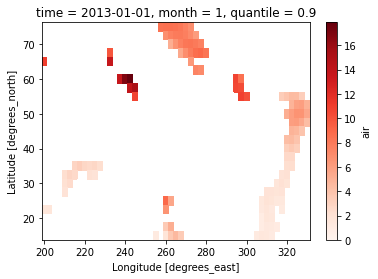

In [9]:
hot_air.isel(time=0).plot(cmap='Reds', vmin=0)

In [10]:
lsmask = xr.ones_like(anom.isel(time=0))

In [11]:
Tracker =  oce.Tracker(hot_air, lsmask, radius=2, min_size_quartile=0, timedim = 'time', xdim = 'lon', ydim='lat', positive=True)


In [12]:
%%time 
blobs = Tracker.track()

minimum area: 4.0
inital objects identified 	 15
final objects tracked 	 6
CPU times: user 4.43 s, sys: 79.1 ms, total: 4.5 s
Wall time: 4.5 s


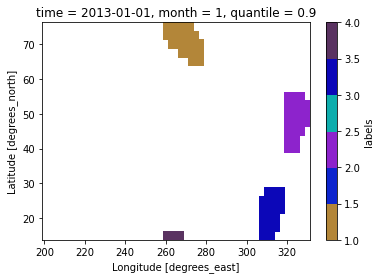

In [13]:
from matplotlib.colors import ListedColormap
maxl = int(np.nanmax(blobs.values))
cm = ListedColormap(np.random.random(size=(maxl, 3)).tolist())


# Make a quick p2ot of the labeled MHWs identified with Ocetrac
blobs.isel(time=0).plot(cmap= cm)
